#**Youtube Analysis**

# Youtube Platform Data 


*   Youtuber Name 
*   Channel Name
*   Category
*   Subscribers
*   Audience Country
*   Average Views
*   Average Likes
*   Average Comments


# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df=pd.read_csv('social media influencers - youtube.csv')

In [6]:
df.shape

(1000, 8)

In [3]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


**We can notice that :**
*   There exist a null values in some columns.
*   How come numerical columns are in type Object by further investigation it was found that any number is followed by either 'M' for million or 'k' for 1000.



In [3]:
sum(df.duplicated())
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()

youtuber name         0
channel name          0
Category            276
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

# Fix Data Type

In [4]:
def convert(likes_str):
    likes_str = str(likes_str)  # convert input to string
    if 'M' in likes_str:
        likes_int = float(likes_str.replace('M', '')) * 1000000
    elif 'K' in likes_str:
        likes_int = float(likes_str.replace('K', '')) * 1000
    else:
        likes_int = float(likes_str)
    return likes_int

df['avg likes'] = df['avg likes'].apply(convert)
df['avg views']=df['avg views'].apply(convert)
df['avg comments']=df['avg comments'].apply(convert)
df['Subscribers']=df['Subscribers'].apply(convert)


# Nulls Handling

In [5]:
df['Category']=df['Category'].fillna(df['Category'].mode()[0])
df['Audience Country']=df['Audience Country'].fillna(df['Audience Country'].mode()[0])
df['avg likes']=df['avg likes'].fillna(df['avg likes'].mean())
df['avg comments']=df['avg comments'].fillna(df['avg comments'].mean())

# Category

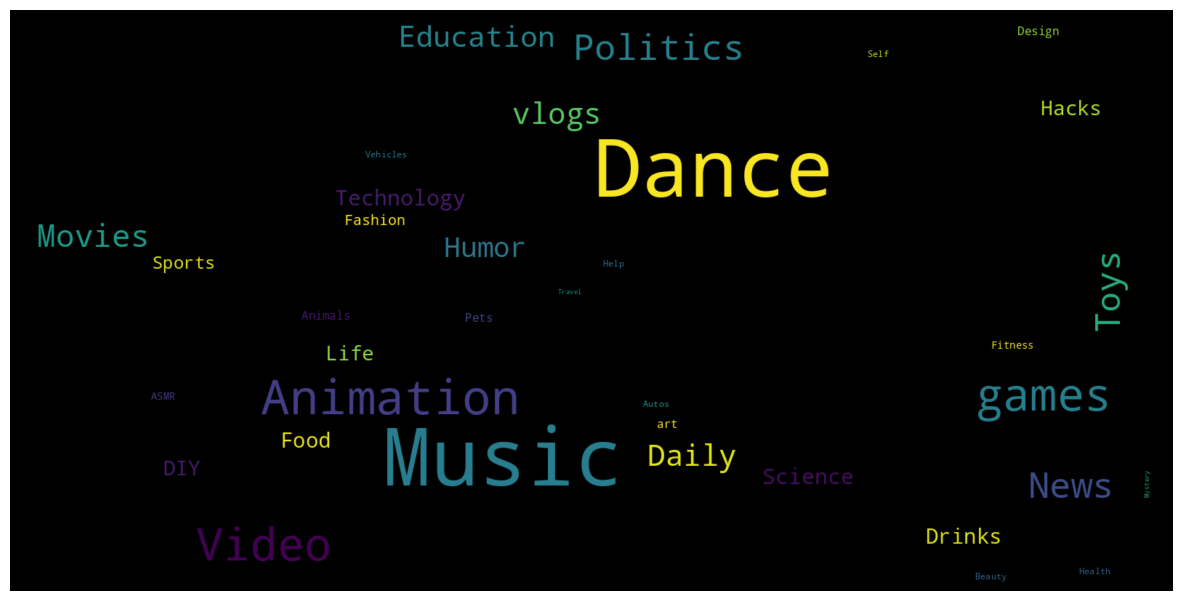

In [30]:
consolidated = ' '.join(word for word in df['Category'].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=21,
                      max_font_size=110, collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

#Most Occuring Categories

In [36]:
top_5 = df['Category'].value_counts().nlargest(5)
print(top_5)

Music & Dance      500
Animation           97
Video games         84
News & Politics     49
Toys                45
Name: Category, dtype: int64


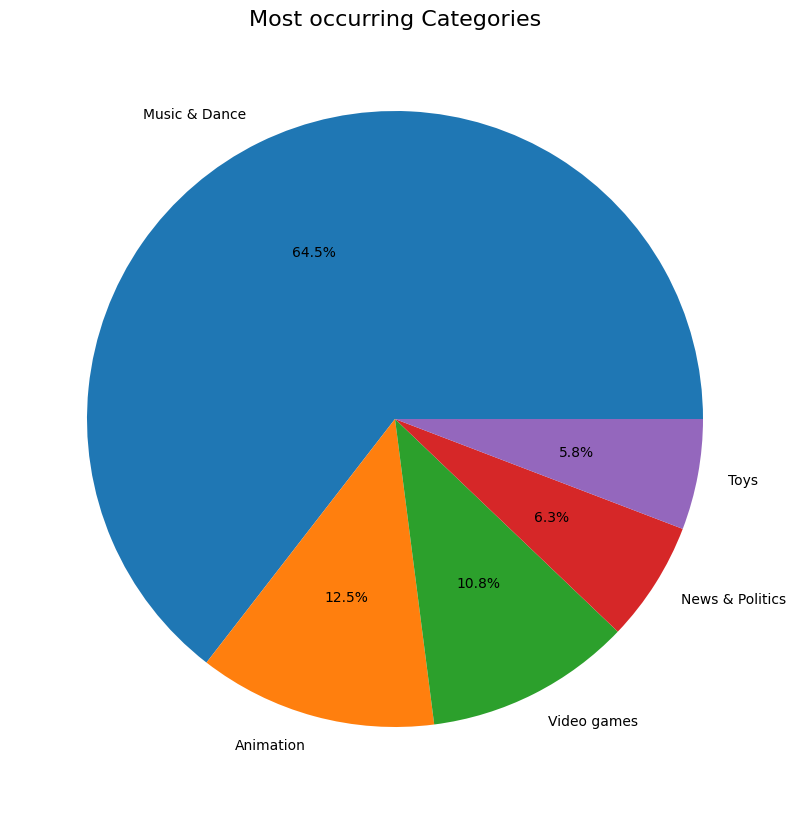

In [34]:
#Show Most occurring Categories
top_5 = df['Category'].value_counts().nlargest(5)
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_5 .values, labels=top_5 .index, autopct='%1.1f%%')
ax.set_title('Most occurring Categories', fontsize=16)
#Show the chart
plt.show()

# Top 10 categories by Subscribers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Top 10 Categories by Subscribers')

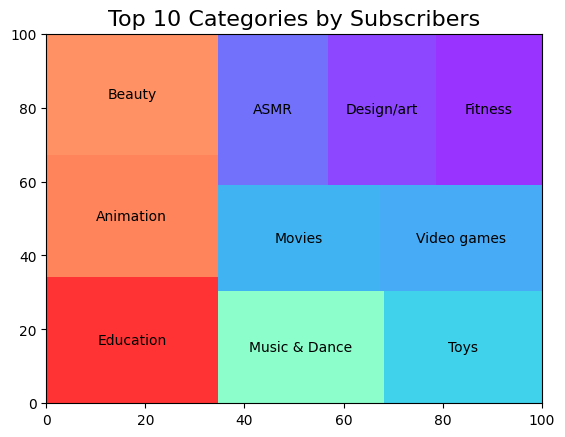

In [60]:
!pip install squarify
import squarify

# # Get the top 10 categories by Subscribers
top_10 = df.groupby('Category')['Subscribers'].mean().nlargest(10)

# # Create a color map
cmap = plt.cm.rainbow

# # Assign a color to each category
mini, maxi = top_10.min(), top_10.max()
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top_10.values]

# # Create the treemap
squarify.plot(sizes=top_10.values, label=top_10.index, alpha=.8, color=colors)

# # Set the chart title
plt.title('Top 10 Categories by Subscribers', fontsize=16)

# # Remove the axis ticks and labels
# plt.axis('off')

# # Show the chart
# plt.show()




*   Beauty ,Animation,Education are most subscribed Categories.




# Most-subscribed YouTube channels

<Axes: xlabel='Subscribers', ylabel='youtuber name'>

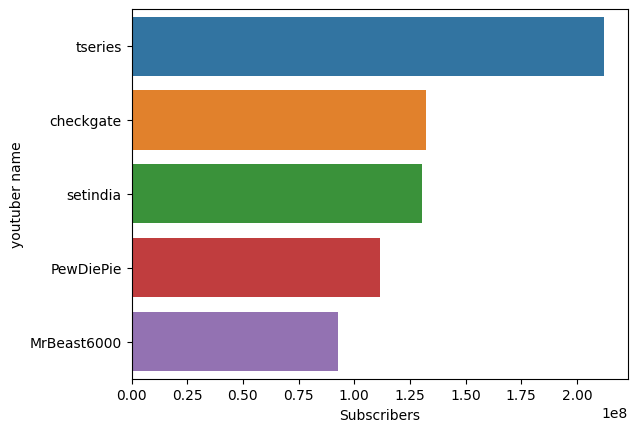

In [9]:
# select the top 5 YouTube channels with the most Subscribers
plt.xlabel('Subscribers in Million')
sns.barplot(y='youtuber name',x='Subscribers',data=df.sort_values(by='Subscribers',ascending=False).head(5))

**Most Subscribed YouTube channels**


*   tseries
*   checkgate
*   setindia
*   PewDiePie
*   MrBeast6000

**It makes sense that channels having most subscriber count to have high views so, Let's check if our assumption is true or not.**

# Most-Viewed YouTube Channels

<Axes: xlabel='avg views', ylabel='youtuber name'>

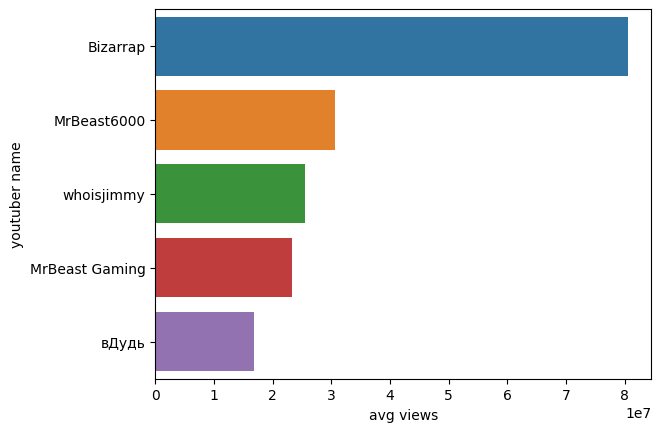

In [12]:
# select the top 5 YouTube channels with the most Viewers
sns.barplot(y='youtuber name',x='avg views',data=df.sort_values(by='avg views',ascending=False).head(5))

**Most-Viewed YouTube Channels**


*   Bizarrap
*   whoisjimmy
*   Mrbeast6000
*   Mrbeast Gaming




**"MrBeast6000" is the only channel that has a large number of subscribers and views at the same time. Although the other four channels have the highest subscriber count, they do not have the most views, indicating a weak engagement rate.**

# Most-Liked YouTube Channels

<Axes: xlabel='avg likes', ylabel='youtuber name'>

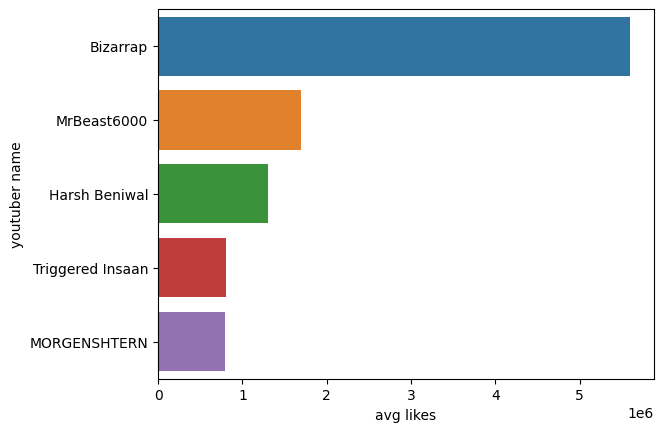

In [14]:
# select the top 5 YouTube channels with the most Likes
sns.barplot(y='youtuber name',x='avg likes',data=df.sort_values(by='avg likes',ascending=False).head(5))


*   "Bizarrap" and "MrBeast6000" have the most views and likes, indicating a good engagement rate. However, the other three channels suffer from the same problem of a weak engagement rate.
*   "Harch Beniwal", "Triggered Insaan", and "MORGENSHTERN" are channels that have the most likes although they weren't from channels having most subscriber count.



# Audience Country

In [18]:
top_5 = df['Audience Country'].value_counts().nlargest(5)
print(top_5)

United States    452
India            207
Brazil            92
Mexico            64
Indonesia         38
Name: Audience Country, dtype: int64


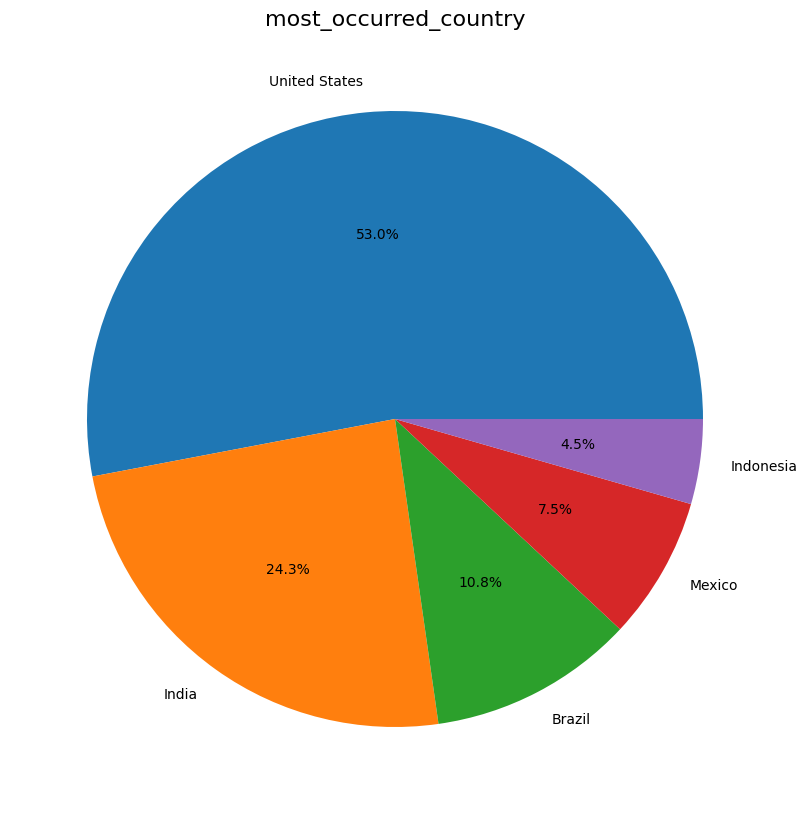

In [58]:
#Show Most occurring Audience Country
top_5 = df['Audience Country'].value_counts().nlargest(5)
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_5 .values, labels=top_5 .index, autopct='%1.1f%%')
ax.set_title('most_occurred_country', fontsize=16)
plt.show()

# Checking the demand for most occured categories by Country wise
# Top 5 Countries in Music & Dance

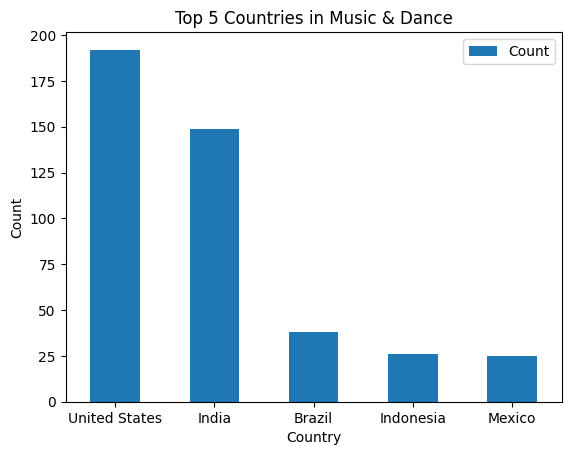

In [51]:
# specify the category to filter the data
category = 'Music & Dance'

# filter the data by the specified category
df_filtered = df.loc[df['Category'] == category]

# group the data by country and count the occurrences
df_grouped = df_filtered.groupby(['Audience Country']).size().reset_index(name='Count')

# sort the data by the count column and select the top 5 rows
df_top5 = df_grouped.sort_values(by='Count', ascending=False).head(5)

# plot the data
ax = df_top5.plot(kind='bar', x='Audience Country', y='Count', rot=0)

# set the chart title and axis labels
ax.set_title(f'Top 5 Countries in {category}')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

plt.show()



**Top 5 Countries in Music & Dance**
*   United States
*   India
*   Brazil
*   Indenosia
*   Mexico


# Top 5 Countries in News and Politics

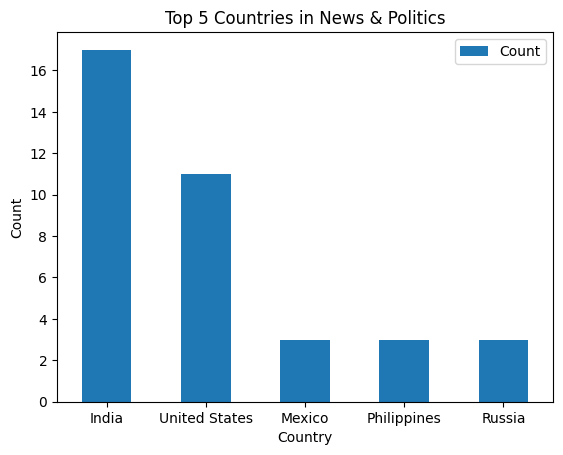

In [54]:

# specify the category to filter the data
category = 'News & Politics'

# filter the data by the specified category
df_filtered = df.loc[df['Category'] == category]

# group the data by country and count the occurrences
df_grouped = df_filtered.groupby(['Audience Country']).size().reset_index(name='Count')

# sort the data by the count column and select the top 5 rows
df_top5 = df_grouped.sort_values(by='Count', ascending=False).head(5)

# plot the data
ax = df_top5.plot(kind='bar', x='Audience Country', y='Count', rot=0)

# set the chart title and axis labels
ax.set_title(f'Top 5 Countries in {category}')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

plt.show()



**Top 5 Countries in News and Politics**

*   India
*   United Stated
*   Mexico
*   Philippines
*   Russia




# Top 5 Countries in Video games

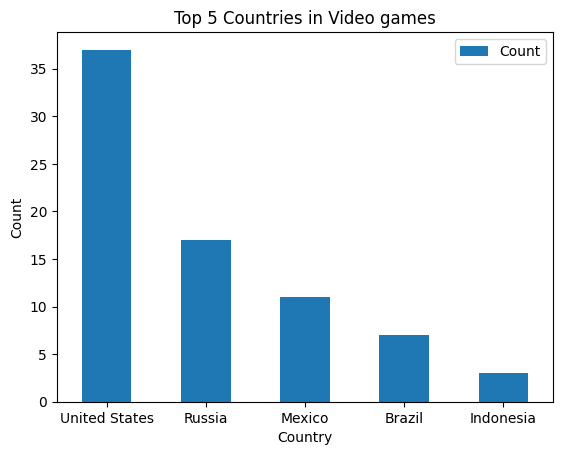

In [53]:
# specify the category to filter the data
category = 'Video games'

# filter the data by the specified category
df_filtered = df.loc[df['Category'] == category]

# group the data by country and count the occurrences
df_grouped = df_filtered.groupby(['Audience Country']).size().reset_index(name='Count')

# sort the data by the count column and select the top 5 rows
df_top5 = df_grouped.sort_values(by='Count', ascending=False).head(5)

# plot the data
ax = df_top5.plot(kind='bar', x='Audience Country', y='Count', rot=0)

# set the chart title and axis labels
ax.set_title(f'Top 5 Countries in {category}')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

plt.show()



**Top 5 Countries in Video games**

*   United States
*   Russia
*   Mexico
*   Brazil
*   Indonesia




# Top 5 Countries in Animation

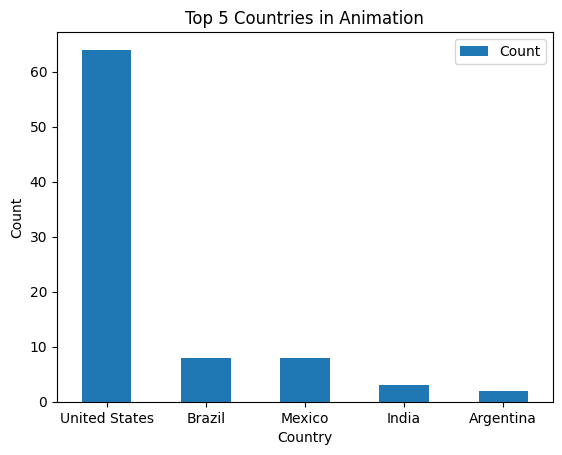

In [52]:
# specify the category to filter the data
category = 'Animation'

# filter the data by the specified category
df_filtered = df.loc[df['Category'] == category]

# group the data by country and count the occurrences
df_grouped = df_filtered.groupby(['Audience Country']).size().reset_index(name='Count')

# sort the data by the count column and select the top 5 rows
df_top5 = df_grouped.sort_values(by='Count', ascending=False).head(5)

# plot the data
ax = df_top5.plot(kind='bar', x='Audience Country', y='Count', rot=0)

# set the chart title and axis labels
ax.set_title(f'Top 5 Countries in {category}')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

plt.show()



**Top 5 Countries in Animation**

*   United States
*   Brazil
*   Mexico 
*   India
*   Argentina

We can notice that united states was trending in all of above Categories so let's Understand trending Categories in US.


# United States Trending Categories

In [38]:
airport = df[df['Audience Country'] == 'United States']
airport_analysis = pd.DataFrame(airport.groupby('Audience Country')['Category'].value_counts())
airport_analysis.head()

Category
Audience Country Category               
United States    Music & Dance       192
                 Animation            64
                 Video games          37
                 Toys                 24
                 Education            22